In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0001223.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

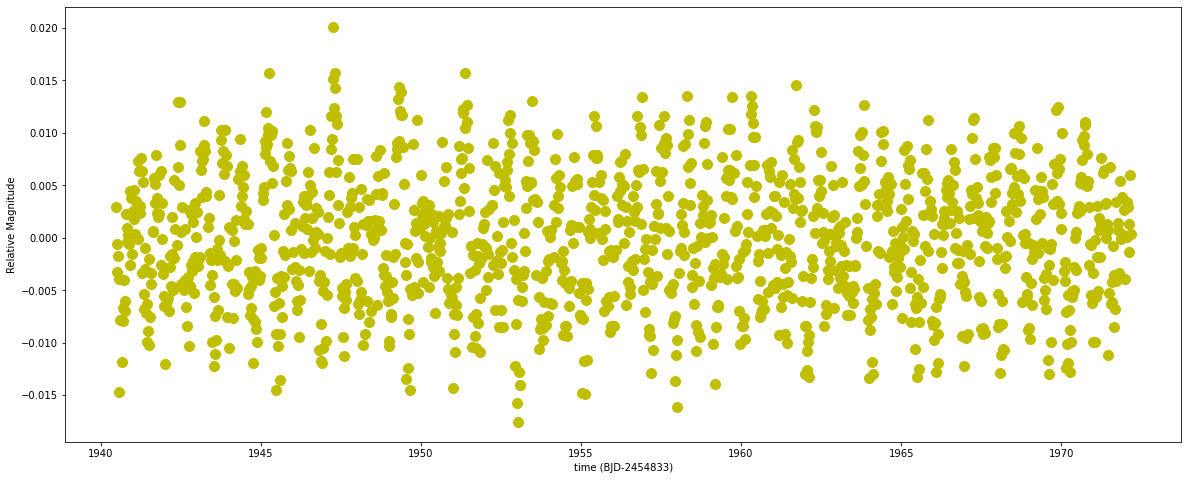

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0001223')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200819 11:48:59 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200819 11:48:59 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200819 11:49:00 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200819 11:49:00 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200819 11:49:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13515384.97098, reduced chisq = 9858.04885
[I 200819 11:49:03 png:696] plotting phased LC with period 0.688903, epoch 1950.12132
[I 200819 11:49:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13685795.55379, reduced chisq = 9982.34541
[I 200819 11:49:03 png:696] plotting phased LC with period 0.344452, epoch 1963.32019
[I 200819 11:49:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13459428.44173, reduced chisq = 9817.23446
[I 200819 11:49:03 png:696] plotting phased LC with period 1.377807, epoch 1969.40886
[I 200819 11:49:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13682820.66903, reduced chisq = 9972.90136
[I 200819 11:49:03 png:696] plotting phased LC with period 0.134964, epoch 1970.87995
[I 200819 11:49:03 nonphysical:216] spline fit done. nknots = 13,  chisq = 13626456.74344, reduced chisq = 9939.06400
[I 200819 11:49:03 png:696] plotting phased LC with period 0.10390

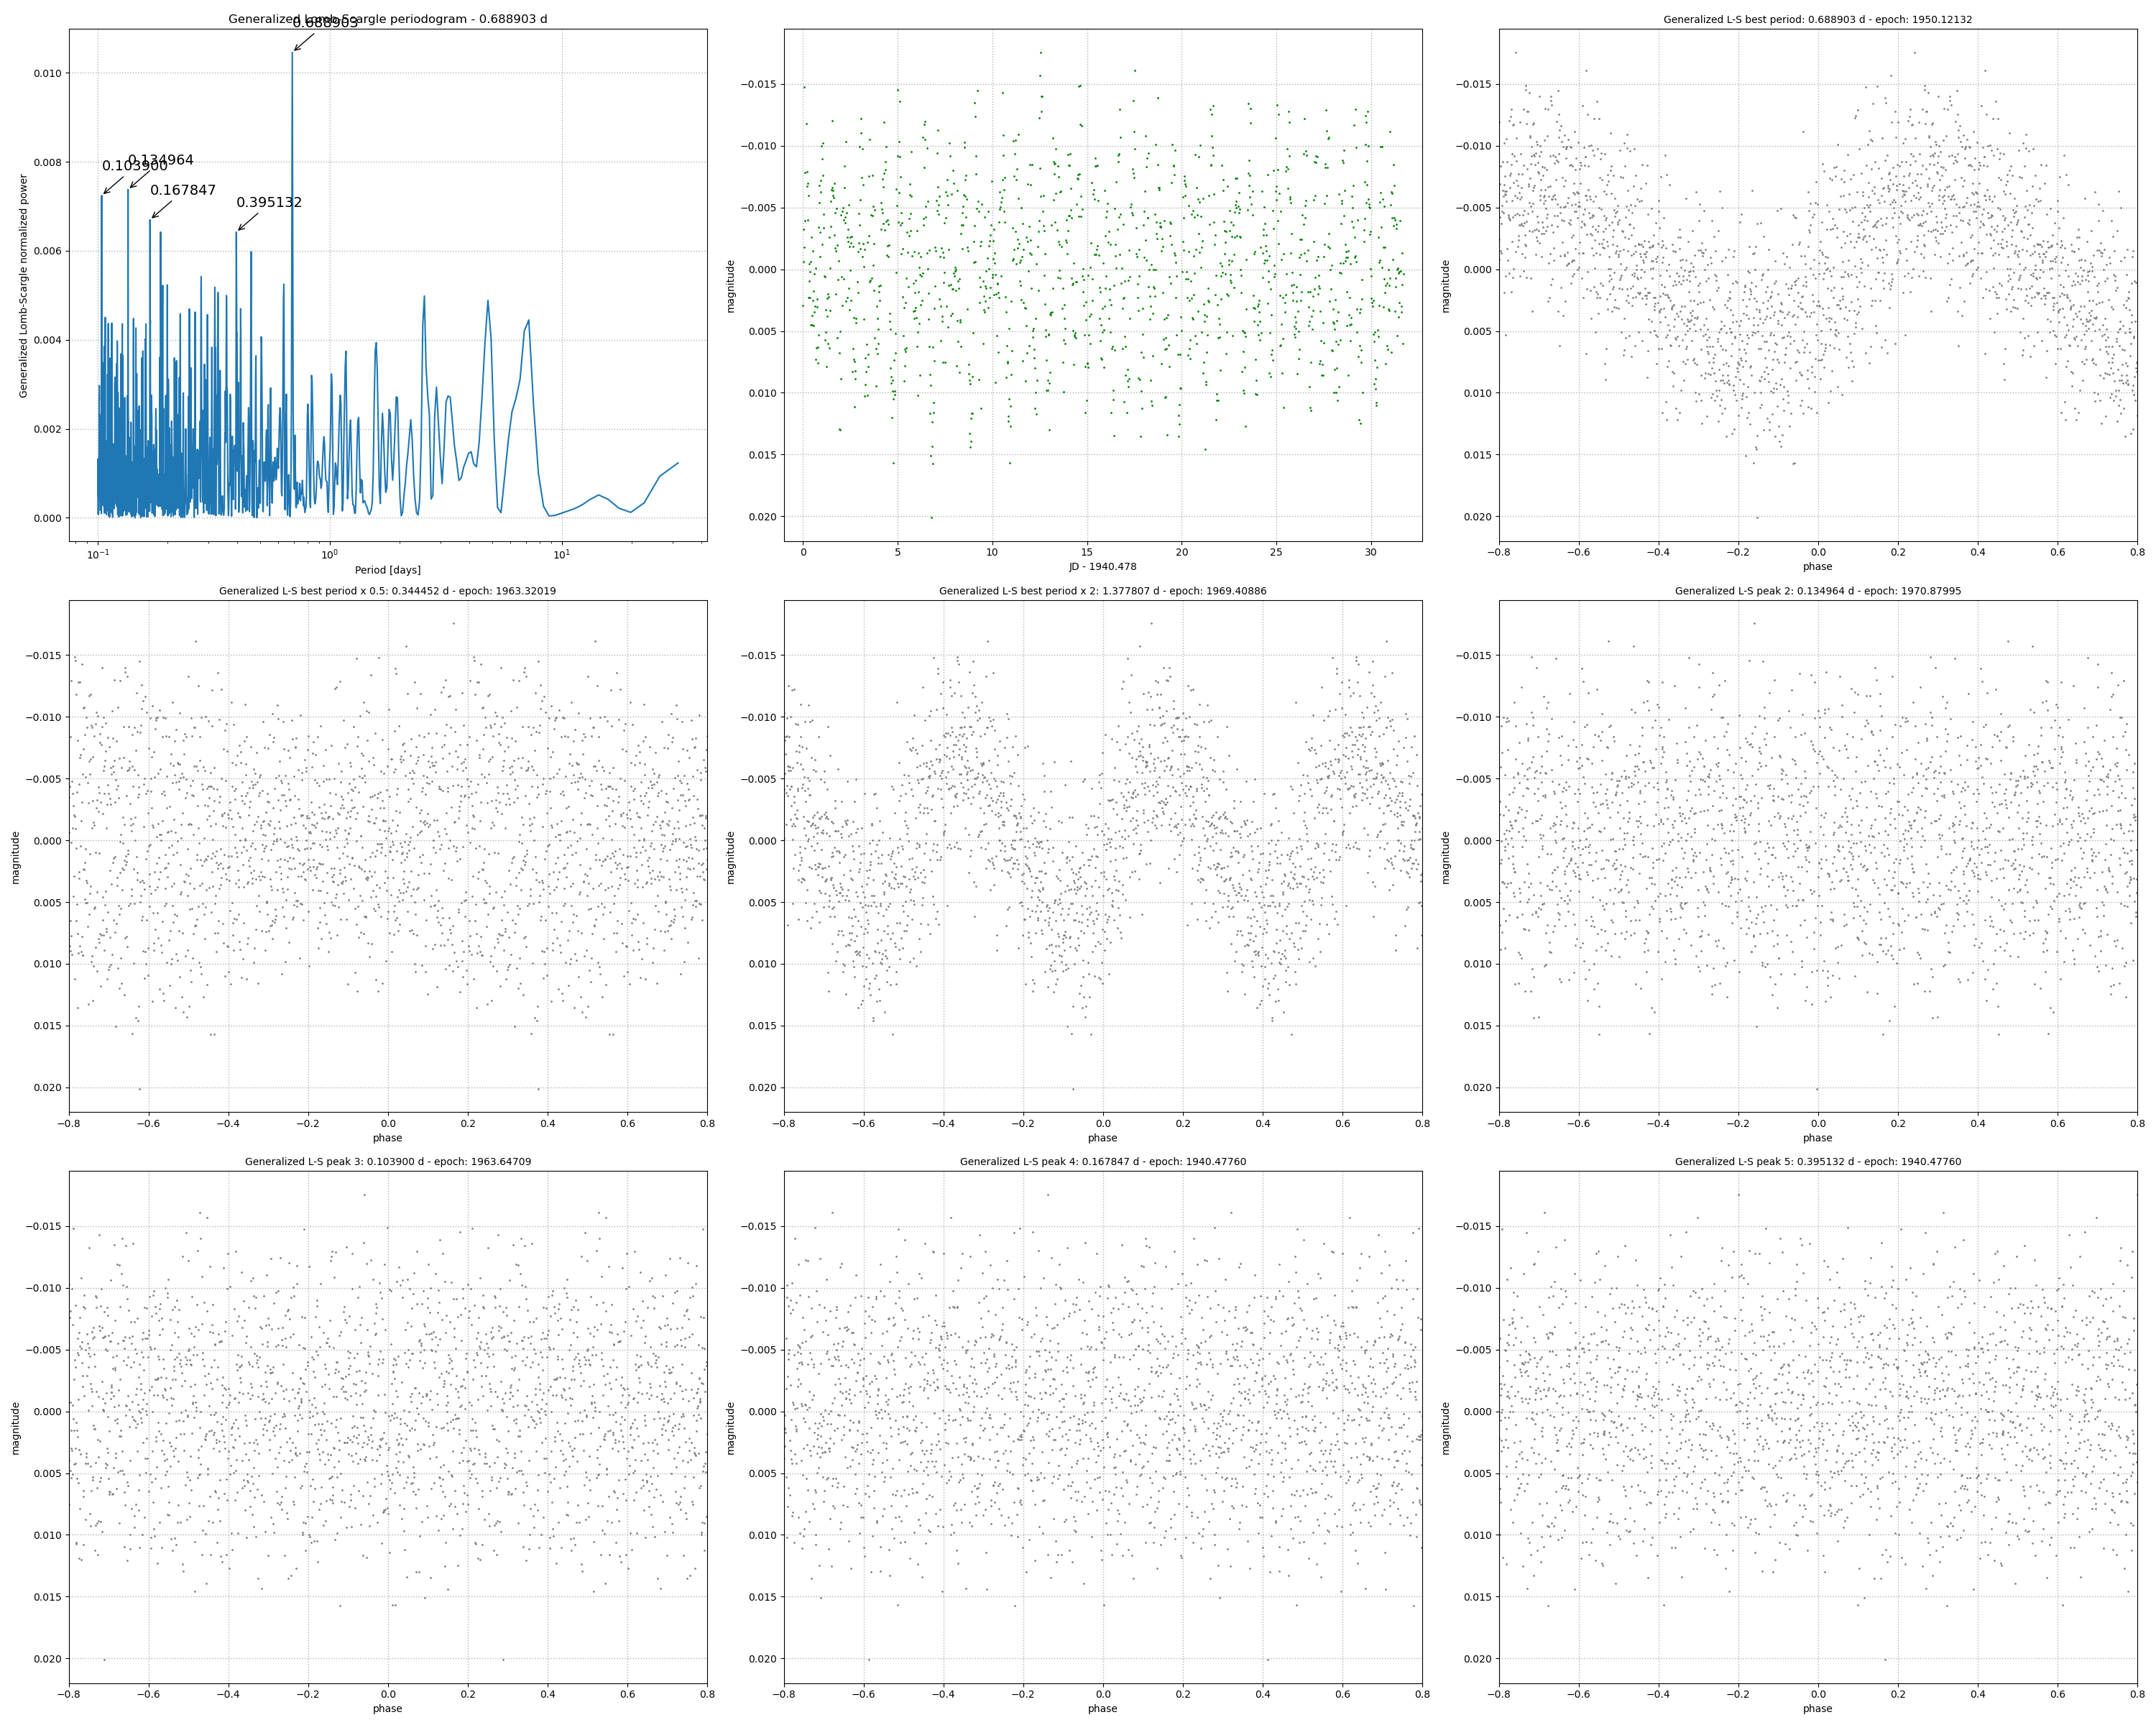

In [8]:
from IPython.display import Image
Image('0001223-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.6889034691304331,
 'bestlspval': 0.010460819921074239,
 'nbestpeaks': 5,
 'nbestlspvals': [0.010460819921074239,
  0.007377296127381917,
  0.0072432865570485755,
  0.006699545006853499,
  0.0064220784833856435],
 'nbestperiods': [0.6889034691304331,
  0.1349640527257237,
  0.10390019534426205,
  0.1678472435381352,
  0.3951316655860339],
 'lspvals': array([0.00123337, 0.00093394, 0.00033627, ..., 0.00086776, 0.00068782,
        0.00050231]),
 'omegas': array([ 0.19827304,  0.23792765,  0.27758226, ..., 62.73358979,
        62.77324439, 62.812899  ]),
 'periods': array([31.68955958, 26.40796632, 22.6353997 , ...,  0.10015664,
         0.10009337,  0.10003018]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.6889034691304331, 0.1349640527257237, 0.10390019534426205, 0.1678472435381352, 0.3951316655860339] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200819 11:49:49 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200819 11:49:49 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889033590665024e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200819 11:49:49 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200819 11:49:49 abls:969] new minfreq: 0.06311226872532019, maxfreq: 10.0
[I 200819 11:49:49 abls:980] using 6 workers...
[I 200819 11:49:49 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200819 11:49:49 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200819 11:49:49 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200819 11:49:49 abls:1090] worker 4: minfreq = 5.058054, nfreqs = 21105
[I 200819 11:49:49 abls:1090] worker 5: minfreq = 6.723034, nfreqs = 21105
[I 200819 11:49:49 abls:1090] worker 6: minfreq = 8.388015, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200819 11:50:01 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200819 11:50:04 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200819 11:50:04 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200819 11:50:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 13632301.49693, reduced chisq = 9936.07981
[I 200819 11:50:07 png:696] plotting phased LC with period 2.057764, epoch 1940.47760
[I 200819 11:50:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 13767965.30380, reduced chisq = 10034.96013
[I 200819 11:50:07 png:696] plotting phased LC with period 1.028882, epoch 1969.28627
[I 200819 11:50:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 13635270.95323, reduced chisq = 9938.24414
[I 200819 11:50:07 png:696] plotting phased LC with period 4.115527, epoch 1940.47760
[I 200819 11:50:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 13515384.97098, reduced chisq = 9858.04885
[I 200819 11:50:07 png:696] plotting phased LC with period 0.688903, epoch 1950.12132
[I 200819 11:50:07 nonphysical:216] spline fit done. nknots = 13,  chisq = 13471635.41927, reduced chisq = 9818.97625
[I 200819 11:50:07 png:696] plotting phased LC with period 1.3778

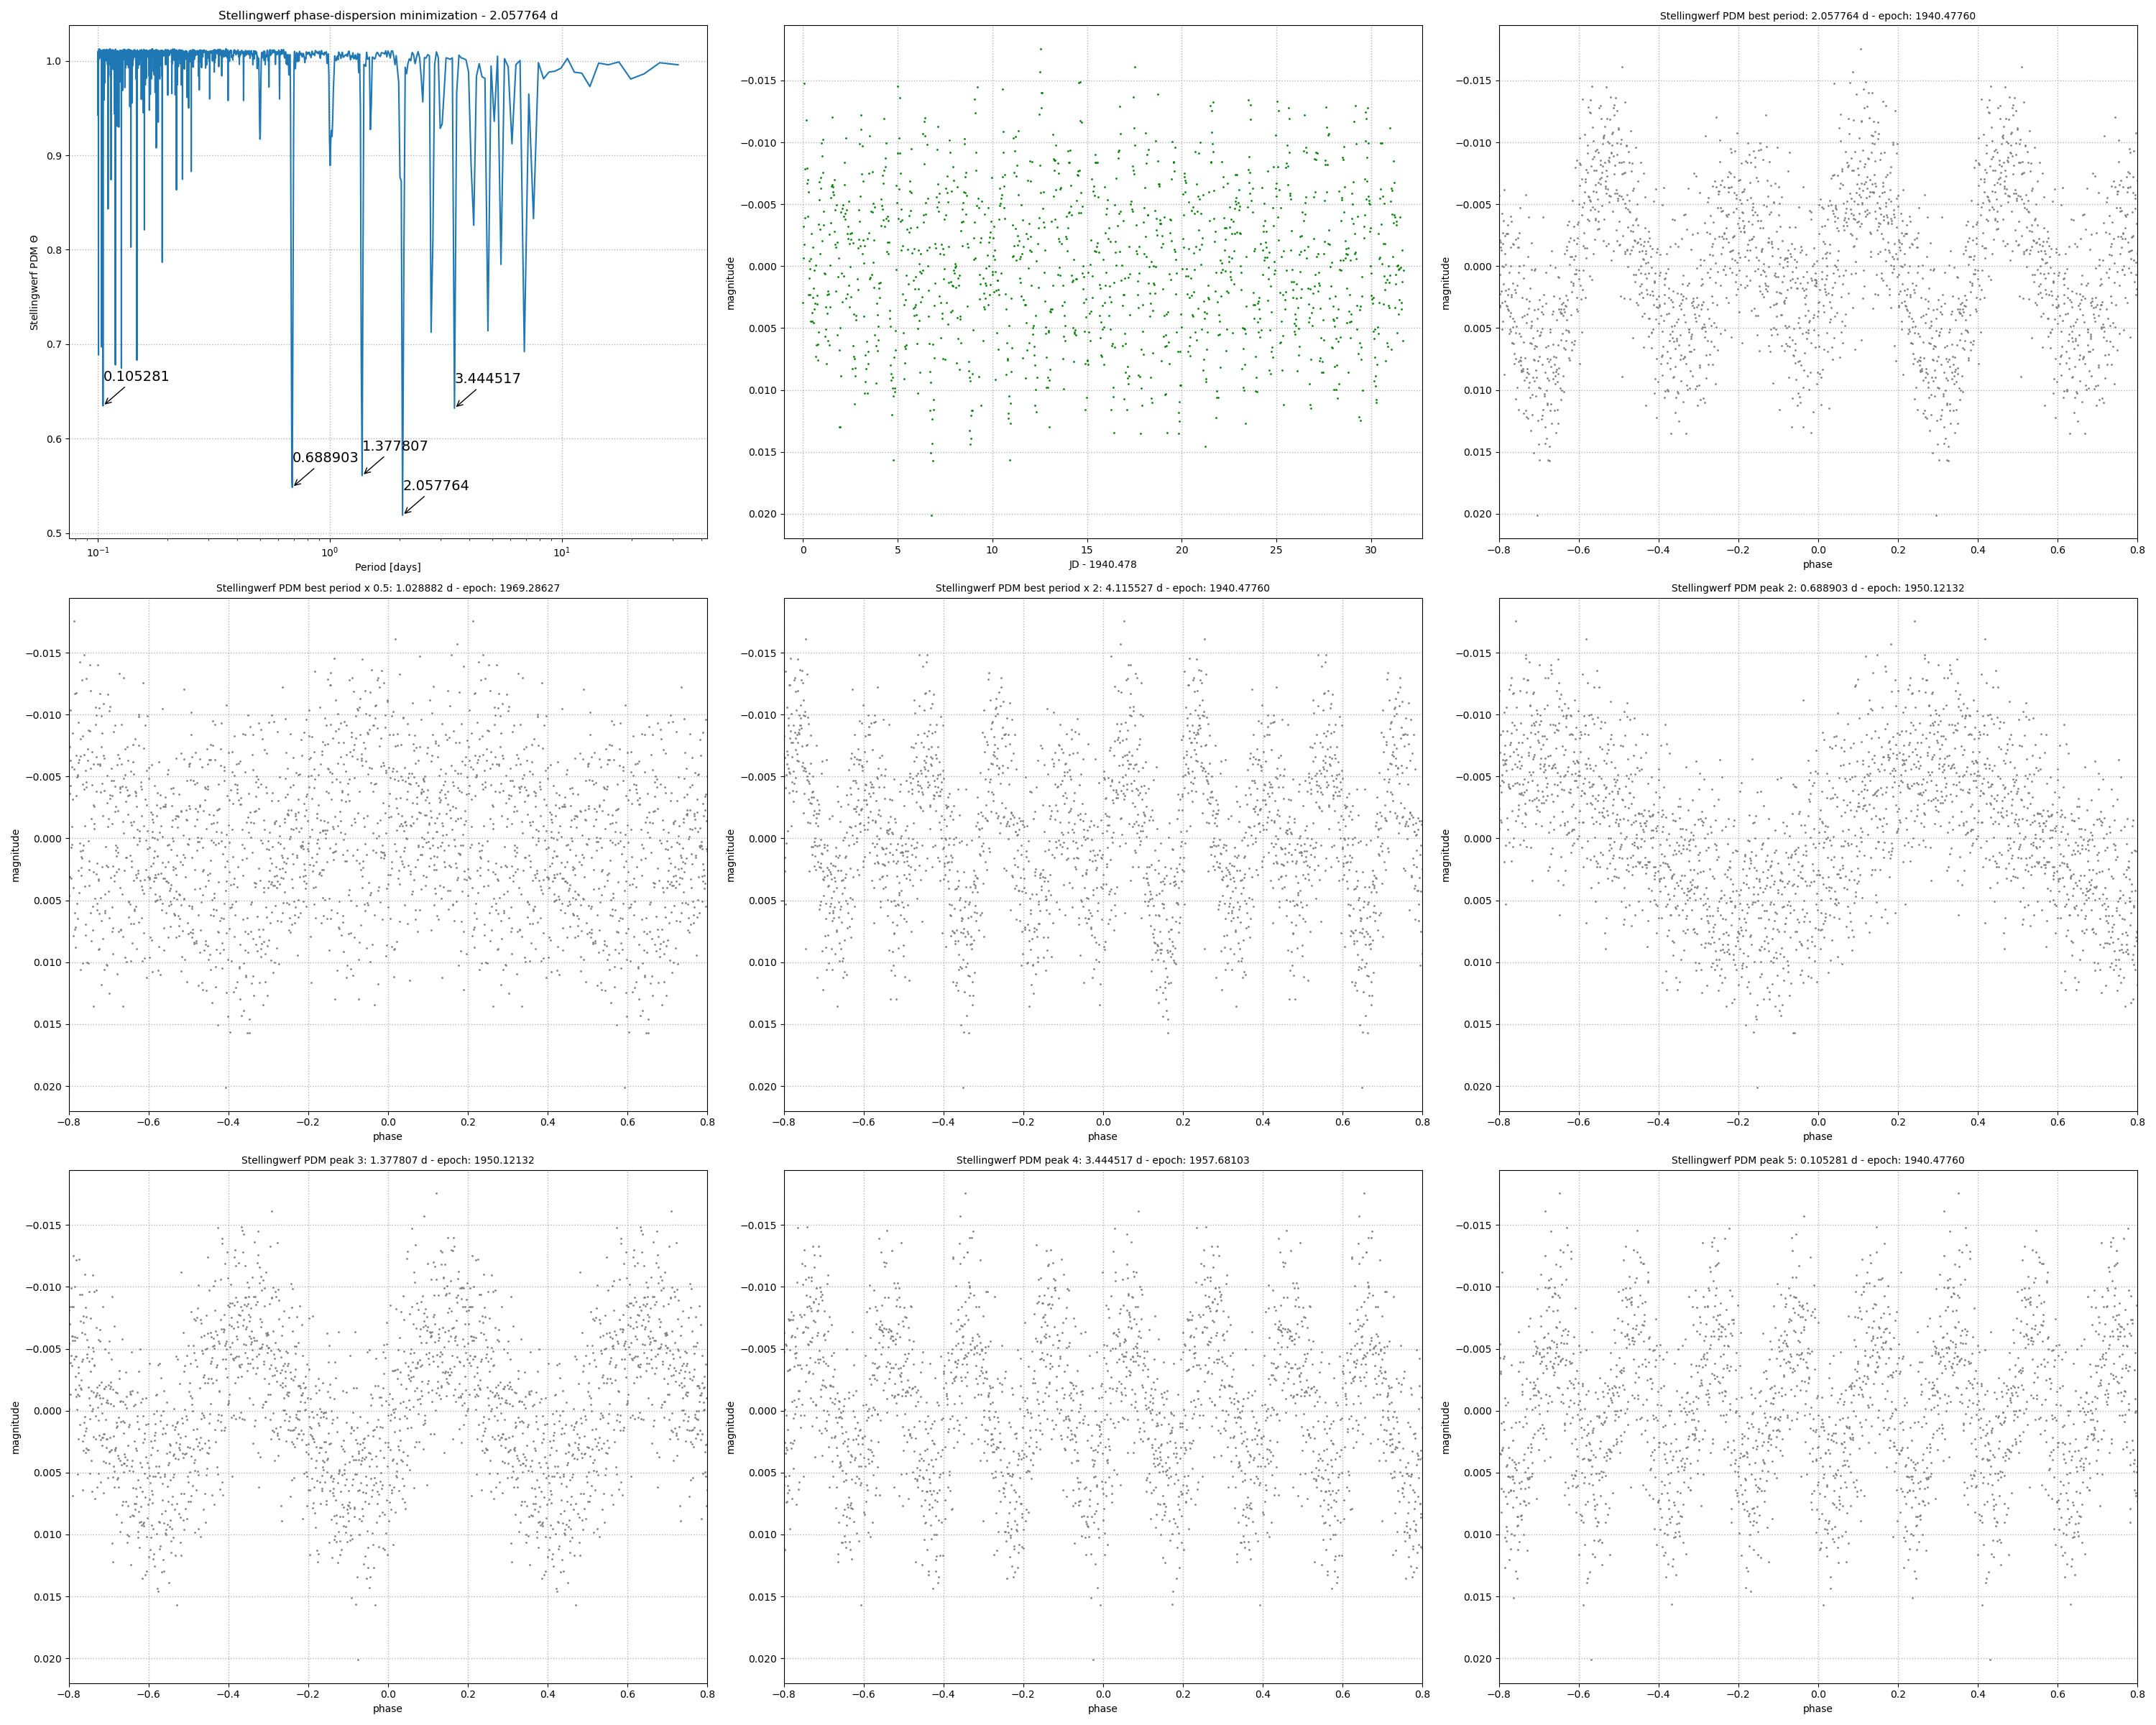

In [15]:
Image('0001223-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [2.057763609090904, 0.6889034691304331, 1.377806938260866, 3.4445173456521654, 0.10528092883720905] (days)
